In [53]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from scipy.stats import norm
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [55]:
symbol = 'AMD'
dataset = yf.download(symbol,start,end)
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,104.320000,105.980003,103.989998,104.650002,104.650002,55227600
2021-08-23,105.300003,109.019997,104.860001,108.769997,108.769997,68835300
2021-08-24,109.449997,109.610001,107.279999,107.650002,107.650002,51239300
2021-08-25,108.129997,109.910004,107.449997,108.300003,108.300003,45485500
2021-08-26,108.570000,109.230003,106.839996,107.269997,107.269997,51442500


In [56]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,-1)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2021-08-23,105.300003,109.019997,104.860001,108.769997,108.769997,68835300,-1,1,-1,0.039369
2021-08-24,109.449997,109.610001,107.279999,107.650002,107.650002,51239300,-1,-1,1,-0.010297
2021-08-25,108.129997,109.910004,107.449997,108.300003,108.300003,45485500,1,1,-1,0.006038
2021-08-26,108.570000,109.230003,106.839996,107.269997,107.269997,51442500,1,-1,1,-0.009511
2021-08-27,108.010002,111.779999,107.800003,111.400002,111.400002,61030000,-1,1,-1,0.038501


In [57]:
print("Mean Values in the Distribution")
print("-"*35)
print(dataset.mean())
print("***********************************")
print("Median Values in the Distribution")
print("-"*35)
print(dataset.median())

Mean Values in the Distribution
-----------------------------------
Open                 1.113813e+02
High                 1.138924e+02
Low                  1.086727e+02
Close                1.113027e+02
Adj Close            1.113027e+02
Volume               8.251734e+07
Increase_Decrease   -4.382470e-02
Buy_Sell_on_Open     1.992032e-02
Buy_Sell            -5.976096e-02
Returns              3.082884e-04
dtype: float64
***********************************
Median Values in the Distribution
-----------------------------------
Open                 1.080100e+02
High                 1.095700e+02
Low                  1.048900e+02
Close                1.072700e+02
Adj Close            1.072700e+02
Volume               8.167250e+07
Increase_Decrease   -1.000000e+00
Buy_Sell_on_Open     1.000000e+00
Buy_Sell            -1.000000e+00
Returns             -1.229593e-03
dtype: float64


In [58]:
print("Mode Value")
print(dataset.mode())

Mode Value
           Open        High         Low       Close   Adj Close     Volume  \
0    108.129997   86.730003   85.080002   86.989998   86.989998   26482600   
1           NaN   98.389999   85.379997  106.150002  106.150002   28815200   
2           NaN  101.849998   88.220001  113.830002  113.830002   30623000   
3           NaN  105.239998   96.730003  132.000000  132.000000   31284400   
4           NaN  125.669998  109.889999         NaN         NaN   31455200   
..          ...         ...         ...         ...         ...        ...   
246         NaN         NaN         NaN         NaN         NaN  164126800   
247         NaN         NaN         NaN         NaN         NaN  164227200   
248         NaN         NaN         NaN         NaN         NaN  164723200   
249         NaN         NaN         NaN         NaN         NaN  180065000   
250         NaN         NaN         NaN         NaN         NaN  225394100   

     Increase_Decrease  Buy_Sell_on_Open  Buy_Sell  

In [59]:
print("Measuring Standard Deviation")
print(dataset.std())

Measuring Standard Deviation
Open                 2.095320e+01
High                 2.136699e+01
Low                  2.024716e+01
Close                2.079630e+01
Adj Close            2.079630e+01
Volume               3.336624e+07
Increase_Decrease    1.001035e+00
Buy_Sell_on_Open     1.001799e+00
Buy_Sell             1.000207e+00
Returns              3.624403e-02
dtype: float64


In [60]:
print("Measuring Skewness")
print(dataset.skew())


Measuring Skewness
Open                 0.510164
High                 0.507679
Low                  0.476721
Close                0.495047
Adj Close            0.495047
Volume               0.658812
Increase_Decrease    0.088262
Buy_Sell_on_Open    -0.040089
Buy_Sell             0.120457
Returns              0.067908
dtype: float64


In [61]:
import math
import matplotlib.mlab as mlab
mu = dataset['Returns'].mean()
sigma = dataset['Returns'].std()

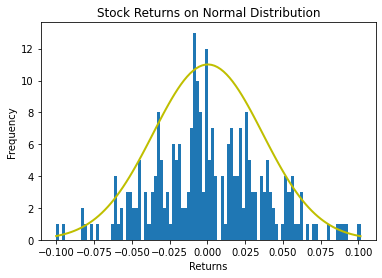

In [62]:
[n,bins,patches] = plt.hist(dataset['Returns'], 100)
s =norm.pdf(bins, mu, sigma)
plt.plot(bins, s, color='y', lw=2)
plt.title("Stock Returns on Normal Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

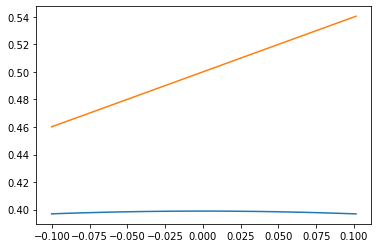

In [63]:
mu = dataset['Returns'].mean()
sigma = dataset['Returns'].std()
x_min = dataset['Returns'].min()
x_max = dataset['Returns'].max()
def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    x = x_range
    if cdf:
        y = norm.cdf(x, mu, sigma)
    else:
        y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
x = np.linspace(x_min, x_max, 100)
plot_normal(x)
plot_normal(x, cdf=True)

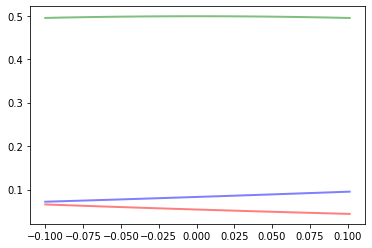

In [64]:
plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1.2, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 0.8, color='green', lw=2, ls='-', alpha=0.5)

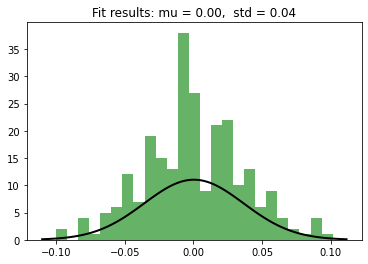

In [65]:
mu, std = norm.fit(dataset['Returns'])
plt.hist(dataset['Returns'], bins=25, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

In [66]:
from scipy import stats
symbol = 'AAPL'
market = 'SPY'
start = '2021-08-20'
end = '2022-08-20'
dataset1 = yf.download(symbol,start,end)
dataset2 = yf.download(market,start,end)
stock_ret = dataset1['Adj Close'].pct_change().dropna()
mkt_ret = dataset2['Adj Close'].pct_change().dropna()
beta, alpha, r_value, p_value, std_err = stats.linregress(mkt_ret, stock_ret)
print(beta, alpha)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
1.2556899091677547 0.0008570088723464972


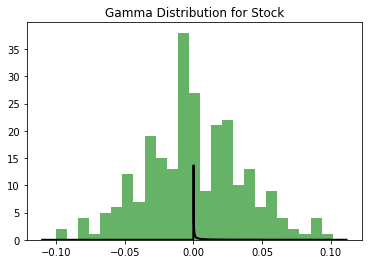

In [67]:
from scipy.stats import gamma
mu, std = gamma.stats(dataset['Returns'])
plt.hist(dataset['Returns'], bins=25, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1171)
p = gamma.pdf(x, alpha, scale=1/beta)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Gamma Distribution for Stock")
plt.show()

In [68]:
from scipy.stats import binom
n = 10 
p = 0.5 
k = np.arange(0,21) 
binomial = binom.pmf(k, n, p)
binomial 

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

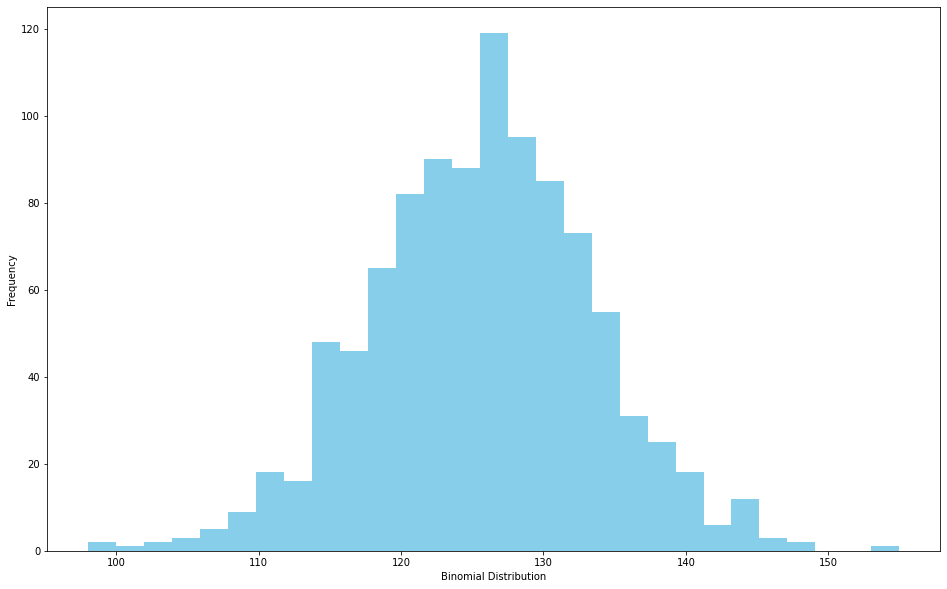

In [69]:
data_binom = binom.rvs(n=len(dataset['Adj Close']),p=0.5,size=1000)
plt.figure(figsize=(16,10))
ax = sns.distplot(data_binom,kde=False,color='skyblue',hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

Mean: 0.000308288
SD: 0.036244


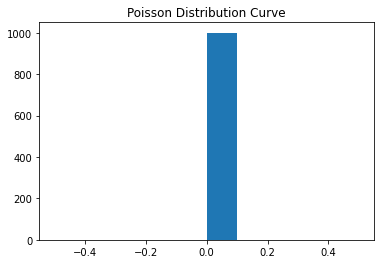

In [70]:
from scipy.stats import poisson
mu = dataset['Returns'].mean()
dist = poisson.rvs(mu=mu, loc=0, size=1000)
print("Mean: %g" % np.mean(dataset['Returns']))
print("SD: %g" % np.std(dataset['Returns'], ddof=1))
plt.hist(dist, bins=10)
plt.title('Poisson Distribution Curve')
plt.show()

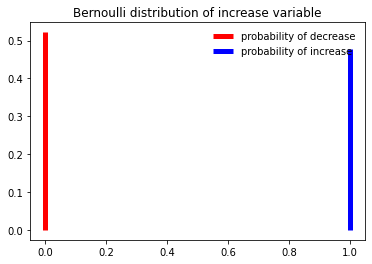

In [71]:
from scipy.stats import bernoulli
countIncrease = dataset[dataset.Increase_Decrease == 1].Increase_Decrease.count()
countAll = dataset.Increase_Decrease.count()
Increase_dist = bernoulli(countIncrease / countAll)
_, ax = plt.subplots(1, 1)
ax.vlines(0, 0, Increase_dist.pmf(0), colors='r', linestyles='-', lw=5, label="probability of decrease")
ax.vlines(1, 0, Increase_dist.pmf(1), colors='b', linestyles='-', lw=5, label="probability of increase")
ax.legend(loc='best', frameon=False)
plt.title("Bernoulli distribution of increase variable")
plt.show()

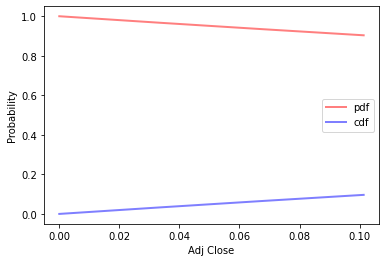

In [72]:
from scipy.stats import expon
mu = dataset['Returns'].mean()
sigma = dataset['Returns'].std()
x_m = dataset['Returns'].max()
def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    if cdf:
        y = expon.cdf(x, mu, sigma)
    else:
        y = expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)
x = np.linspace(0, x_m, 5000)
plot_exponential(x, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.xlabel('Adj Close')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()

In [73]:
symbol = 'AAPL'
market = 'SPY'
start = '2021-08-20'
end = '2022-08-20'
dataset1 = yf.download(symbol,start,end)
dataset2 = yf.download(market,start,end)
stock_ret = dataset1['Adj Close'].pct_change().dropna()
mkt_ret = dataset2['Adj Close'].pct_change().dropna()
beta, alpha, r_value, p_value, std_err = stats.linregress(mkt_ret, stock_ret)
print(beta, alpha)
print("R-squared=", r_value**2)
print("p-value =", p_value)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
1.2556897033531091 0.0008570092260184499
R-squared= 0.7260058095224041
p-value = 5.903130141221109e-72


In [74]:
if p_value < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


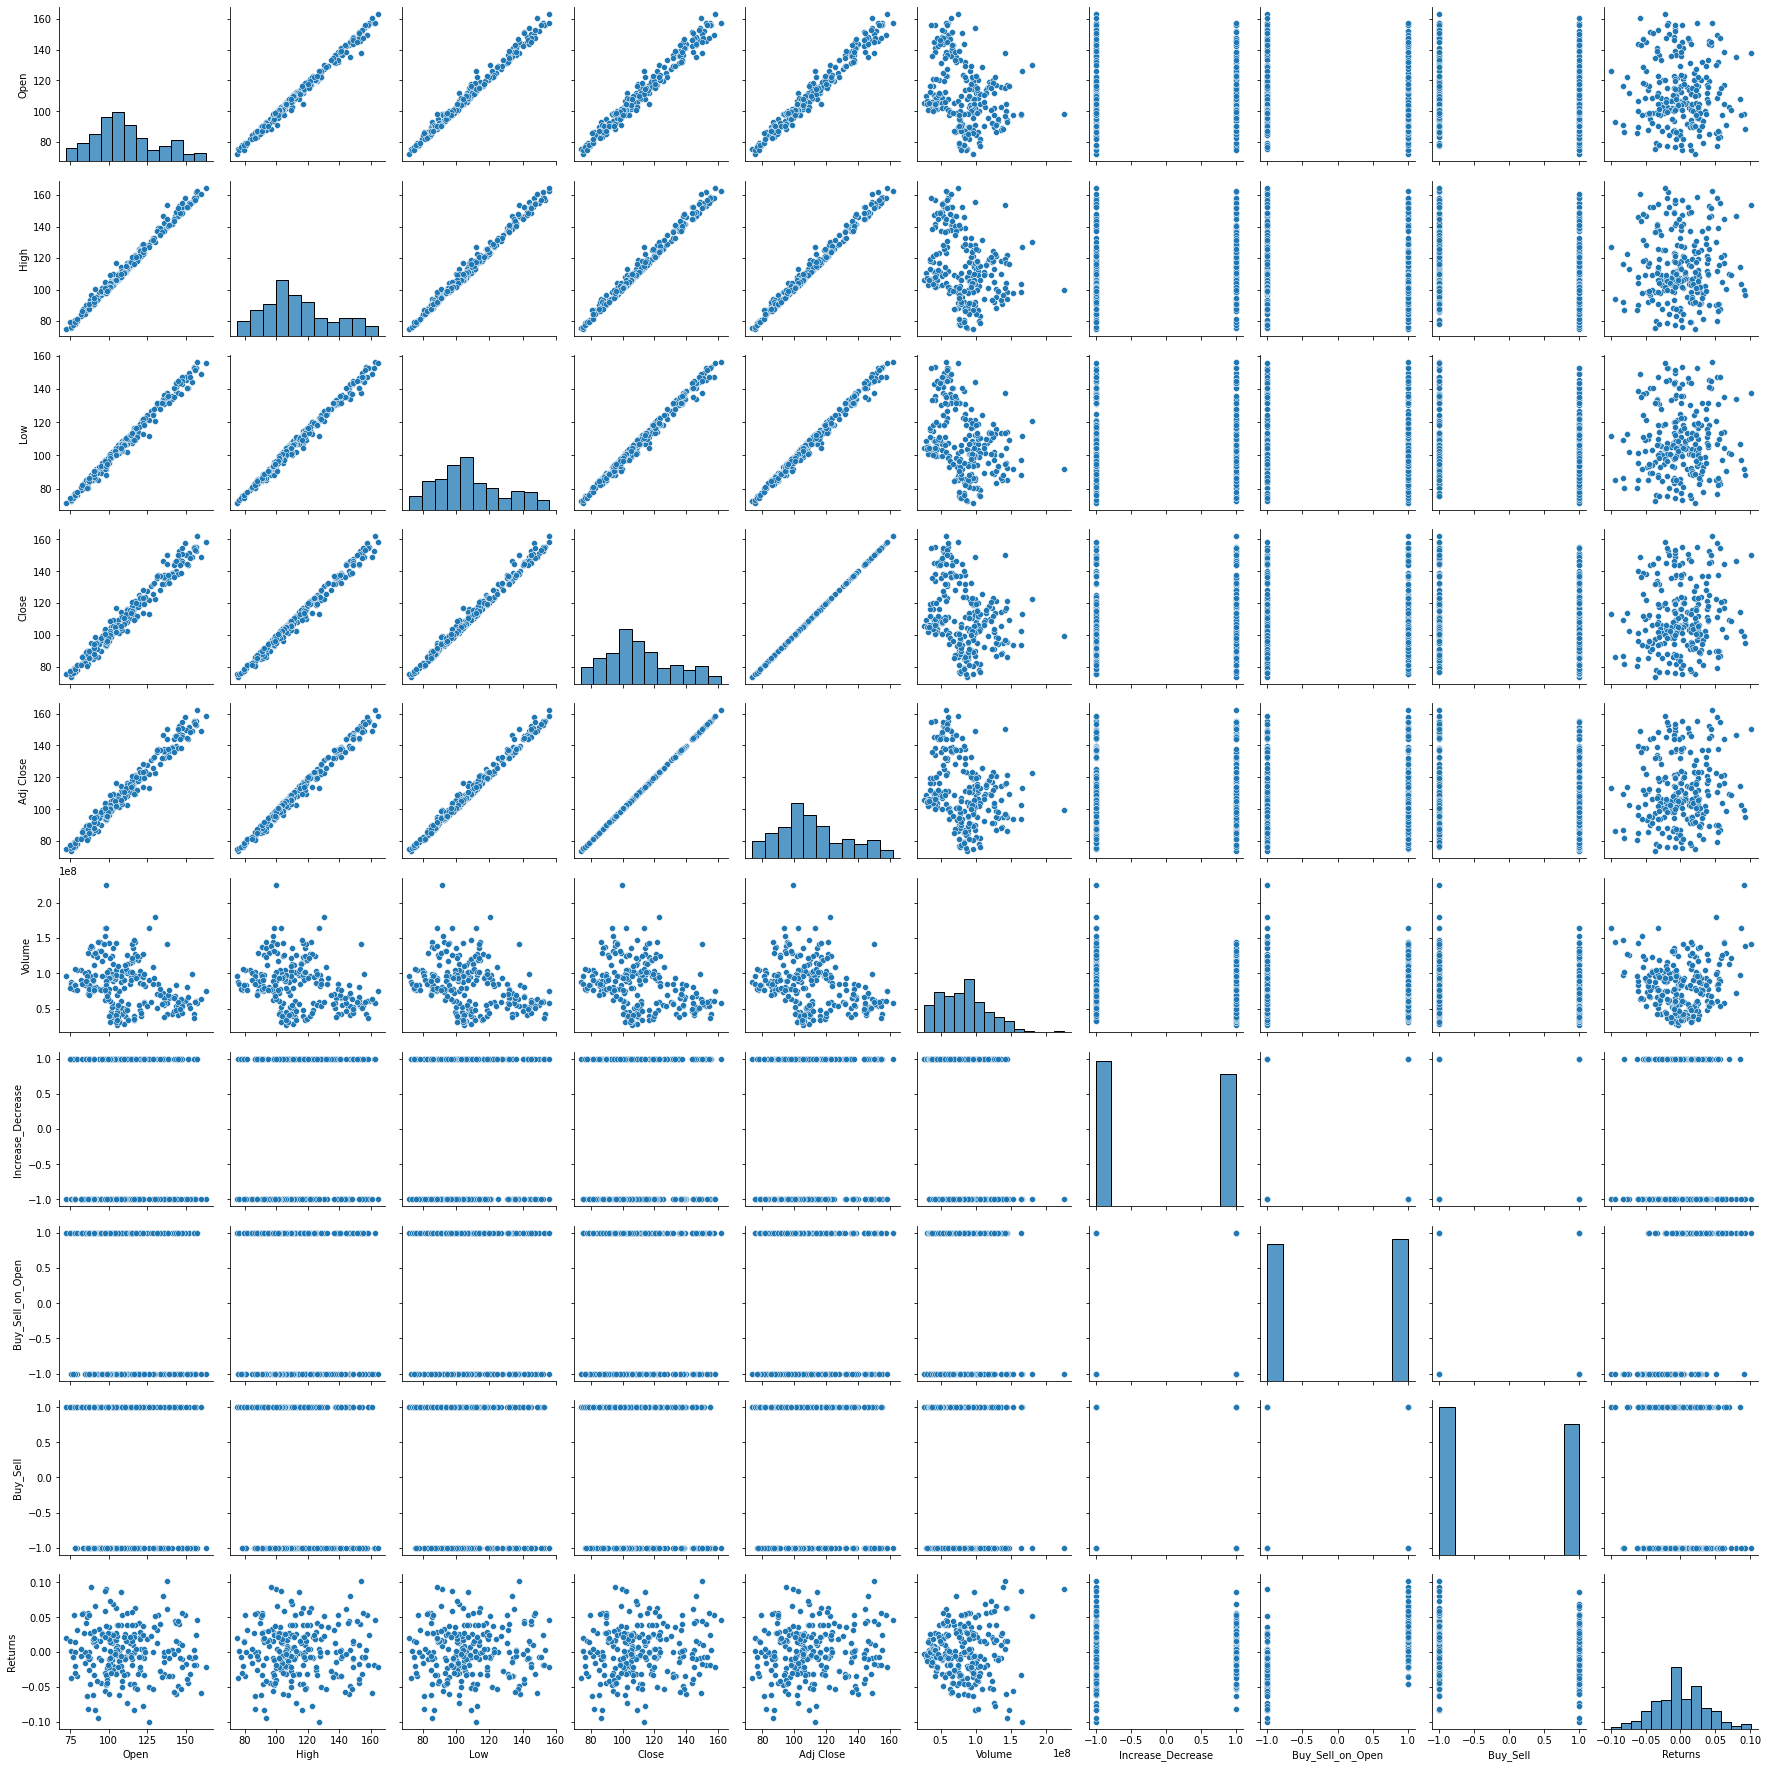

In [75]:
sns.pairplot(dataset, kind="scatter")
plt.show()

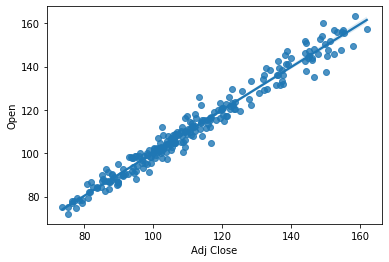

In [76]:
sns.regplot(x = "Adj Close", y = "Open", data = dataset)
plt.show()